22H1120016 - Trần Đăng Nam

Thử điều chỉnh các tham số của cây quyết định và chọn tham số cho kết quả là giá trị f-score tốt nhất 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split #split train and test data
from sklearn.preprocessing import StandardScaler #scale data
from sklearn.tree import DecisionTreeClassifier # decision tree

from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer,f1_score
from sklearn.model_selection import GridSearchCV #grid search
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns



In this context: GridSearch is essentially running 144 different experiments for you to find the optimal parameter combination:

It tries 144 different parameter combinations (8 max_depth options × 3 min_samples_split options × 3 min_samples_leaf options × 2 criterion options)

For each combination, it performs 5-fold cross-validation (meaning it actually trains 5 temporary models for each parameter set)

In total, it trains 144 × 5 = 720 temporary decision tree models

After all this experimentation, GridSearch determines which parameter combination yielded the best average F1-score across the cross-validation folds.


In [3]:
#Load iris
iris = load_iris()

#Split data train and test 
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.3, 
                                                    train_size=0.7,
                                                    random_state=43, 
                                                    stratify = iris.target)

#Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


1. GridSearchCV sets up the grid search process:

a. creates a decision tree classifier with a fixed random seed (42) for reproducibility

b. uses parameter grid  declare before

c. evaluates models using the F1 score metric (f1_scorer)

d. this perform  5 time cross validation (iterates 5 times)

e. uses all available CPU cores for parallel processing (n_jobs=-1)


2. training process - grid_search.fit 

a. trains and evaluates 144 different decision tree models (all parameter combinations)

b. For each parameter combination, it performs 5-fold cross-validation


3. The best_params and best_score lines:

After all the training and evaluation, they extract the results

In [36]:
# Define the parameter grid to search -> this has 144 posible combinations -> grid search find the best combinatio nn
param_grid = {
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a scorer using F1 score (macro average for multiclass)
f1_scorer = make_scorer(f1_score, average='macro')

# Create the grid search with cross-validation -> sets up the grid search process:
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42), # Set random_state for reproducibility 
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5, # chạy nhiều cv quá bị overfit đấy 
    n_jobs=-1 #Uses all available CPU cores to run the search in parallel
)

# Train "many" model for finding the best parameters. Not for training the model for use. 
# Tức là chạy model với combination tương ứng -> grid search sẽ tìm ra combination tốt nhất dựa vào model
grid_search.fit(X_train_scaled, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best F1 Score (CV): {best_score:.4f}")


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best F1 Score (CV): 0.9522


Test F1 Score: 0.9778
Test Accuracy: 0.9778
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


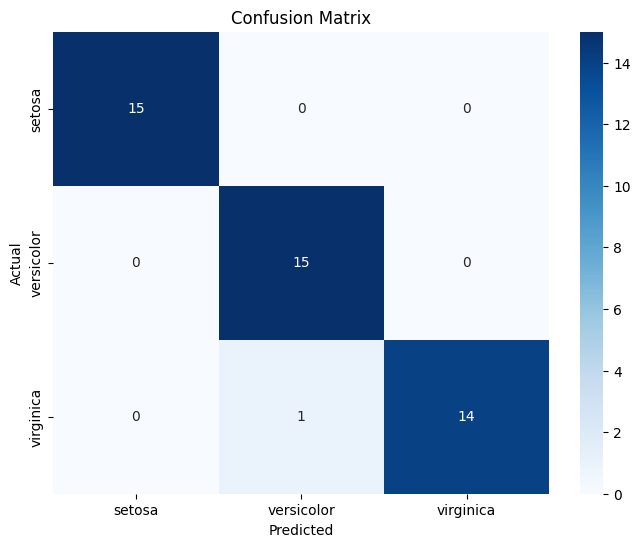

In [12]:

# Train the model with the best parameters
best_dt = DecisionTreeClassifier(random_state=42, **best_params) #train "new tree" base on the "best params" which selected by GridSearchCV
best_dt.fit(X_train_scaled, Y_train)

# Evaluate on the test set
y_pred = best_dt.predict(X_test_scaled)  #This is the predicted value
test_f1 = f1_score(Y_test, y_pred, average='macro')
test_accuracy = accuracy_score(Y_test, y_pred)

print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred) # y_pred is built in in 

print("Confusion Matrix:")
print(conf_matrix)



#plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, 
            fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

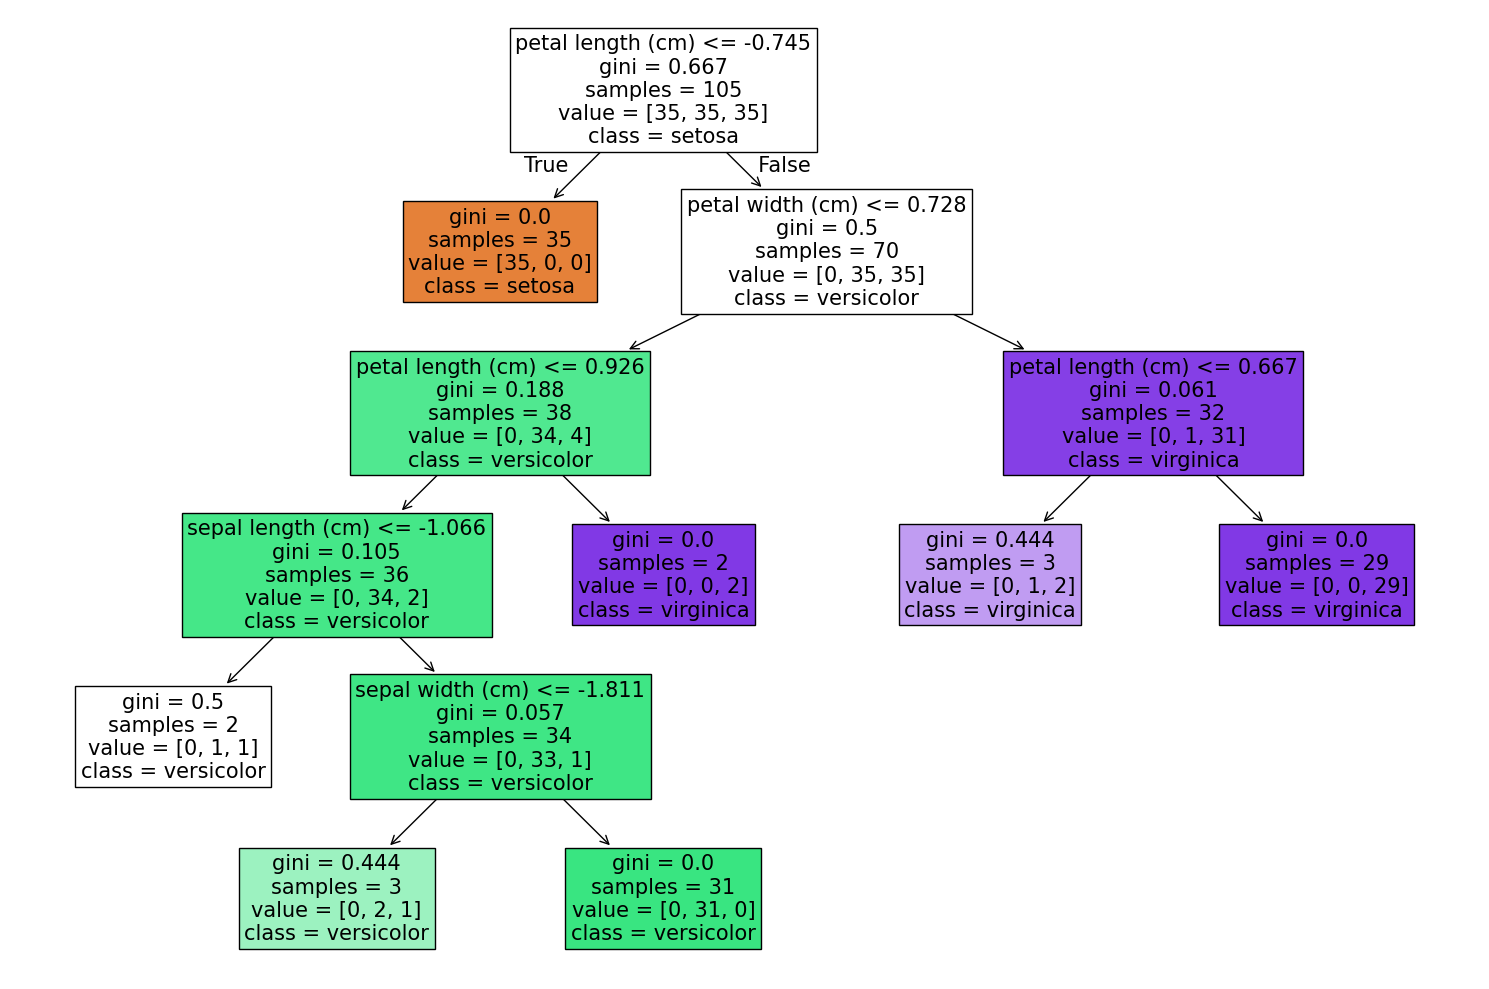

In [30]:
#plot tree

plt.figure(figsize=(15, 10))  # Smaller figure size (originally 15,10)
plot_tree(
    best_dt, #plot best model 
    filled=True, 
    feature_names = iris.feature_names, 
    class_names = iris.target_names,
    #max_depth=3,           # Limit display depth
    fontsize = 15,            # Smaller font
    # proportion=False,      # Don't show proportions
    # impurity=False         # Don't show Gini impurity 
)
plt.tight_layout()
plt.show()